In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import chardet

with open("prueba.csv", "rb") as f:
    result = chardet.detect(f.read())
    encoding = result["encoding"]

df = pd.read_csv("prueba.csv", encoding=encoding, on_bad_lines="skip",sep=";")



In [3]:
# ## 2. Preprocesamiento de datos
# Eliminar filas con valores nulos
df.dropna(inplace=True)

In [4]:
# Codificar variables categóricas
encoder = LabelEncoder()
df['Plataforma'] = encoder.fit_transform(df['Plataforma'])
df['Genero'] = encoder.fit_transform(df['Genero'])
df['Editorial'] = encoder.fit_transform(df['Editorial'])

In [5]:
# ## 3. Definir variables predictoras y objetivo
X = df[['Plataforma', 'Año', 'Genero', 'Editorial', 'Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros']]
y = df['Ventas Global']


In [6]:
# ## 4. División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# ## 5. Modelo de predicción
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
# ## 6. Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 0.04425846440264261, MSE: 0.7585673895169721, R2: 0.8227849044952269


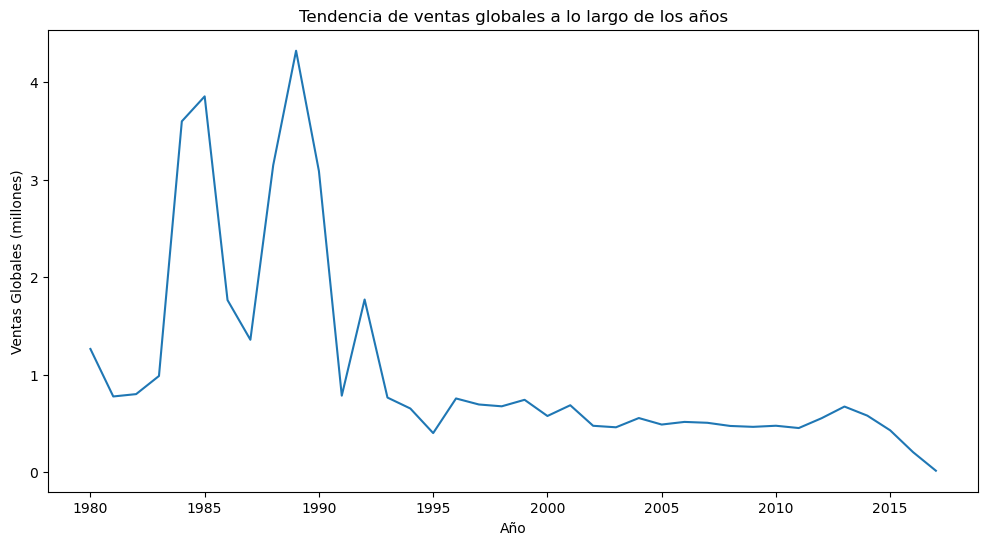

In [9]:
# ## 7. Análisis de tendencias
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Año', y='Ventas Global', errorbar=None)
plt.title("Tendencia de ventas globales a lo largo de los años")
plt.xlabel("Año")
plt.ylabel("Ventas Globales (millones)")
plt.show()

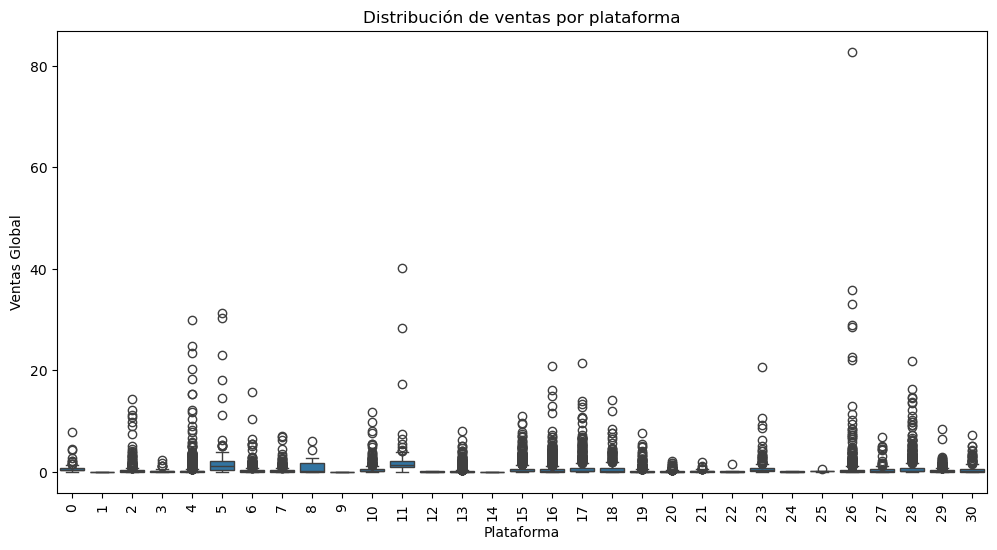

In [10]:
# ## 8. Comparación de plataformas
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Plataforma', y='Ventas Global')
plt.xticks(rotation=90)
plt.title("Distribución de ventas por plataforma")
plt.show()

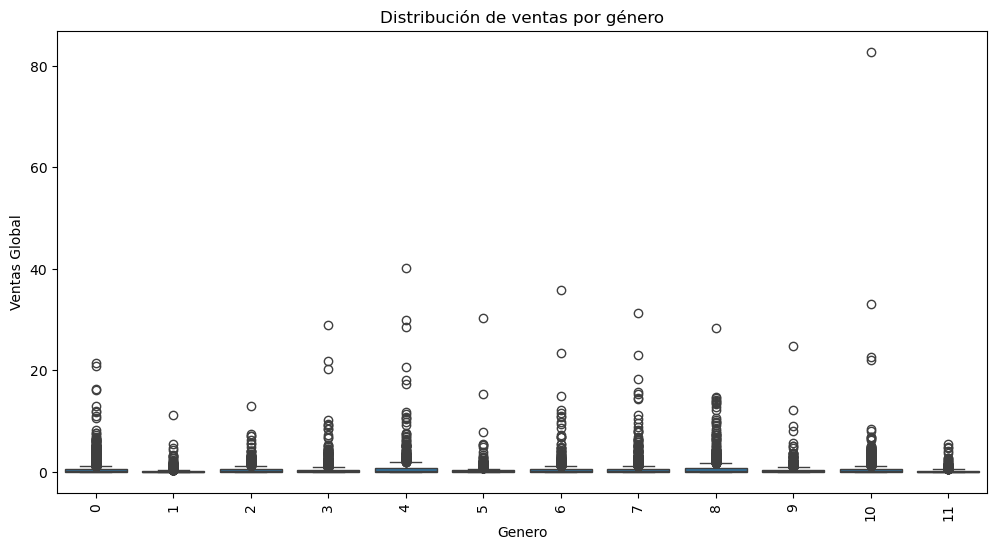

In [11]:
# ## 9. Comparación de géneros
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genero', y='Ventas Global')
plt.xticks(rotation=90)
plt.title("Distribución de ventas por género")
plt.show()
